In [86]:
# Data Science packages
import pandas as pd
import numpy as np

# Graphing packages
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine import *

# Interactive plot packages
import plotly
import plotly.plotly as py
import plotly.graph_objs as go

In [87]:
def read_key(keyfile):
    with open(keyfile) as f:
        return f.readline().strip("\n")
    
key = read_key("../keys/plotly_key.txt")

plotly.tools.set_credentials_file(username = 'aialba', api_key = key)

In [223]:
cols = pd.read_csv('../stuff.csv')

cols

df_2017 = pd.read_csv('../personsx.csv', usecols = cols['Feature name in Doc'])
df_2017 = df_2017.fillna(0)
df_2017.head()

,SEX,NOWAF,FMX,RACRECI3,R_MARITL,HISCODI3,AGE_P,SRVY_YR,PARENTS,DAD_DEGP,...,LADURA18,LADURB17,LADURB18,LACHRC17,LACHRC18,HIKINDNK,YRSINUS,CITIZENP,EDUC1,ERNYR_P
0,2,0.0,1,1,4,2,65,2017,4,0.0,...,0.0,0.0,0.0,0.0,0.0,2,0.0,1,15,0.0
1,2,2.0,1,2,7,3,27,2017,4,0.0,...,0.0,0.0,0.0,0.0,0.0,2,0.0,1,13,0.0
2,1,0.0,1,2,0,3,10,2017,1,0.0,...,0.0,0.0,0.0,0.0,0.0,2,0.0,1,3,0.0
3,1,2.0,1,1,7,2,19,2017,4,0.0,...,0.0,0.0,0.0,0.0,0.0,2,0.0,1,15,1.0
4,2,2.0,1,1,1,2,43,2017,4,0.0,...,0.0,0.0,0.0,0.0,0.0,2,0.0,1,14,0.0


## Distribution of Income

In [184]:
ernyr_p_key = {1: '01-4,999', 2: '05,000-9,999', 3: '10,000-14,999',
               4:'15,000-19,999', 5: '20,000-24,999', 6: '25,000-34,999',
              7: '35,000-44,999', 8: '45,000-54,999', 9: '55,000-64,999',
              10: '65,000-74,999', 11: '75,000 and over', 0: 'Unknown',
              97: 'Refused', 98: 'Not ascertained', 99: 'Don\'t know'}

df_2017 = df_2017.sort_values(by = ['ERNYR_P'])
df_2017['ERNYR_P'] = df_2017['ERNYR_P'].apply(lambda x: ernyr_p_key[x])
df_2017['ERNYR_P'].value_counts()

Unknown            38573
75,000 and over     6276
25,000-34,999       4322
Don't know          4167
Refused             3890
35,000-44,999       3672
45,000-54,999       3088
55,000-64,999       2387
20,000-24,999       2347
01-4,999            2066
15,000-19,999       1942
10,000-14,999       1933
05,000-9,999        1739
65,000-74,999       1707
Not ascertained       23
Name: ERNYR_P, dtype: int64

In [92]:
not_unknown = [(a != 'Unknown') for a in df_2017['ERNYR_P']]
incomes = df_2017['ERNYR_P'][not_unknown]

[Text(0, 0.5, 'Persons'), Text(0.5, 0, 'Earnings (USD)')]

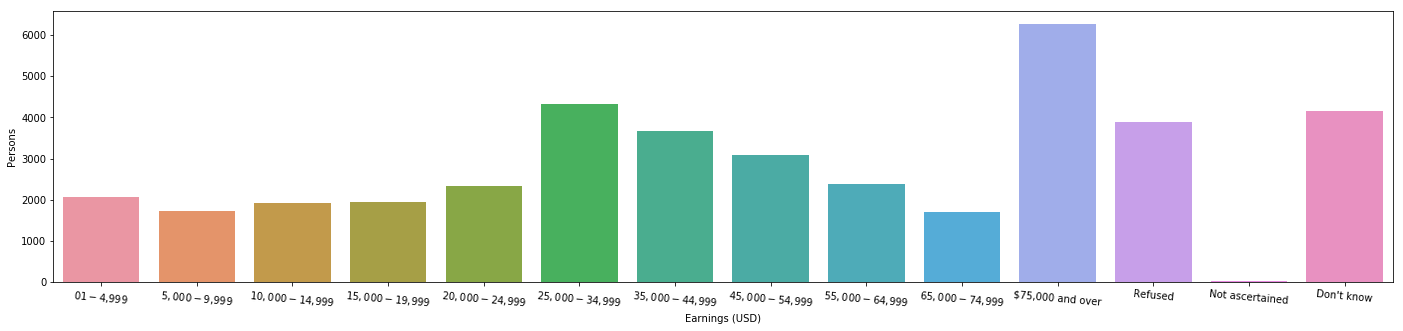

In [68]:
plt.figure(figsize = (24, 5))

income_plot = sns.countplot(x = incomes)
income_plot.set_xticklabels(income_plot.get_xticklabels(), rotation = -5)
income_plot.set(xlabel = 'Earnings (USD)', ylabel = 'Persons')

## Plot for Depression

In [188]:
ladurb17_key = {1: 'Depressed for Less than 2 months', 2: 'Depressed for 3-5 months', 
                3: 'Depressed for 6-12 months', 4: 'Depressed for More than 1 year',
               7: 'Refused', 8: 'Not Ascertained', 9: 'Don\'t Know' , 0: 'Unknown'}

df_2017 = df_2017.sort_values( by = ['LADURB17'])
df_2017['LADURB17'] = df_2017['LADURB17'].apply(lambda x: ladurb17_key[x])

not_unknown = [(a != 'Unknown') for a in df_2017['LADURB17']]
depression = df_2017['LADURB17'][not_unknown]
depression.value_counts()

Depressed for More than 1 year      1443
Depressed for 6-12 months             59
Don't Know                            10
Depressed for 3-5 months               8
Depressed for Less than 2 months       8
Refused                                5
Not Ascertained                        1
Name: LADURB17, dtype: int64

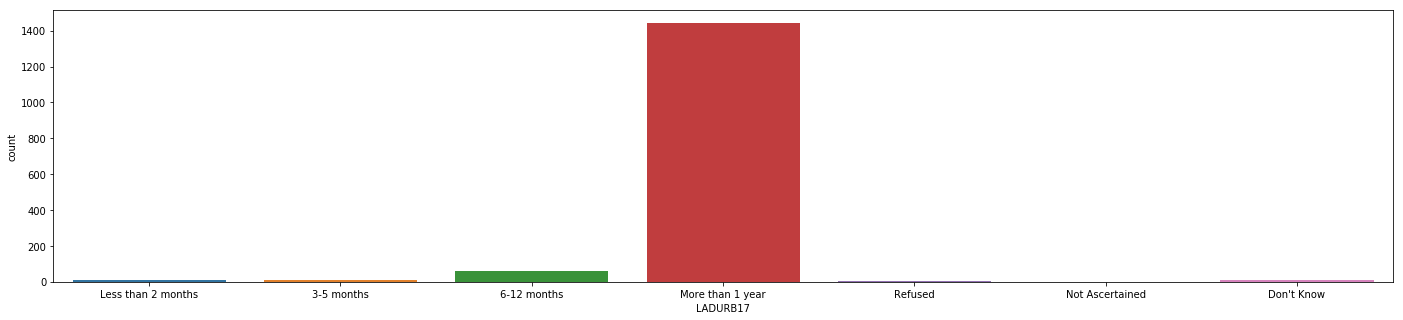

In [85]:
plt.figure(figsize = (24, 5))

depression_plot = sns.countplot(x = depression)

## Plot for Depression by Income Level

In [189]:
# Reading in the Column names
cols = pd.read_csv('../stuff.csv')

# Reading the CSV
df_2017 = pd.read_csv('../personsx.csv', usecols = cols['Feature name in Doc'])
df_2017 = df_2017.fillna(0)

# Sorting it by the columns of interest
df_2017 = df_2017.sort_values(by = ['ERNYR_P', 'LADURB17'])

# Subsetting the DF to only columns of interest
df = df_2017[['ERNYR_P', 'LADURB17']]

# Renaming the factor levels
df['ERNYR_P'] = df['ERNYR_P'].apply(lambda x: str(ernyr_p_key[x]))
df['LADURB17'] = df['LADURB17'].apply(lambda x: str(ladurb17_key[x]))

# Removing the NA factor values
df = df[df['LADURB17'] != 'Unknown']
df = df[df['ERNYR_P'] != 'Unknown']
df.head()

/Users/Andy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/Andy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,ERNYR_P,LADURB17
5580,"01-4,999",Depressed for 6-12 months
9187,"01-4,999",Depressed for 6-12 months
21989,"01-4,999",Depressed for 6-12 months
25516,"01-4,999",Depressed for 6-12 months
25696,"01-4,999",Depressed for 6-12 months


In [115]:
df = df[['LADURB17', 'ERNYR_P']]
df.head()

temp = pd.DataFrame(df[df['LADURB17'] == 'More than 1 year']['ERNYR_P'].value_counts())
temp = temp.reset_index()
temp.columns = ['Income', 'Count']
temp['Depression Length'] = 'More than 1 year'
temp = temp[['Depression Length', 'Income', 'Count']]
temp

,Depression Length,Income,Count
0,More than 1 year,"$01-$4,999",71
1,More than 1 year,Don't know,44
2,More than 1 year,"$5,000-$9,999",40
3,More than 1 year,"$25,000-$34,999",31
4,More than 1 year,"$10,000-$14,999",28
5,More than 1 year,"$35,000-$44,999",23
6,More than 1 year,"$15,000-$19,999",20
7,More than 1 year,"$75,000 and over",18
8,More than 1 year,"$20,000-$24,999",18
9,More than 1 year,"$55,000-$64,999",15


In [129]:
df['LADURB17'].value_counts()

More than 1 year      1443
6-12 months             59
Don't Know              10
Less than 2 months       8
3-5 months               8
Refused                  5
Not Ascertained          1
Name: LADURB17, dtype: int64

In [179]:
def make_df_for_counts(df, category, second_category, value, name1, name2):
    temp = pd.DataFrame(df[df[category] == value][second_category].value_counts())
    temp = temp.reset_index()
    temp.columns = [name2, 'Count']
    temp[name1] = value
    temp = temp[[name1, name2, 'Count']]
    temp = temp.sort_values([name2])
    return temp

def make_trace(df, category, value):
    trace = go.Bar(
        x = df[category],
        y = df['Count'],
        name = value
    )
    return trace

In [169]:
make_df_for_counts(df, 'LADURB17', 'ERNYR_P', 'More than 1 year', 'Depression Length', 'Income')

,Depression Length,Income,Count
0,More than 1 year,"$01-$4,999",71
1,More than 1 year,Don't know,44
2,More than 1 year,"$5,000-$9,999",40
3,More than 1 year,"$25,000-$34,999",31
4,More than 1 year,"$10,000-$14,999",28
5,More than 1 year,"$35,000-$44,999",23
6,More than 1 year,"$15,000-$19,999",20
7,More than 1 year,"$75,000 and over",18
8,More than 1 year,"$20,000-$24,999",18
9,More than 1 year,"$55,000-$64,999",15


In [178]:
income_levels

array(['$01-$4,999', '$5,000-$9,999', '$10,000-$14,999',
       '$15,000-$19,999', '$20,000-$24,999', '$25,000-$34,999',
       '$35,000-$44,999', '$45,000-$54,999', '$55,000-$64,999',
       '$65,000-$74,999', '$75,000 and over', 'Refused', "Don't know"],
      dtype=object)

In [192]:
depression_levels = df['LADURB17'].unique()

traces = [ make_trace(
    make_df_for_counts(df, 'LADURB17', 'ERNYR_P', a, 'Depression Length', 'Income'), 'Income', a) for a in depression_levels]

layout = go.Layout(
    barmode = 'stack',
    showlegend = True,
    title = 'Depression Length X Income', 
    
    xaxis=dict(
        title= 'Income Level (USD)',
        titlefont=dict(
            family='Arial, sans-serif',
            size=18,
            color='black'
        )
    ),
    
    yaxis = dict(
        title = 'Count',
        titlefont=dict(
            family='Arial, sans-serif',
            size=18,
            color='black'
        ),
        
        showticklabels=True,
    )
)

fig = go.Figure(data=traces, layout=layout)
plotly.offline.plot(fig, filename='depressionXincome.html')
py.iplot(fig, filename= 'depression X income')

/Users/Andy/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



## Plot of Age

In [224]:
df_age = df_2017

df_age['LADURB17'] = df_age['LADURB17'].apply(lambda x: str(ladurb17_key[x]))
df_age = df_age[df_age['LADURB17'] != 'Unknown']

In [226]:
df_age['LADURB17'].value_counts()

Depressed for More than 1 year      1443
Depressed for 6-12 months             59
Don't Know                            10
Depressed for 3-5 months               8
Depressed for Less than 2 months       8
Refused                                5
Not Ascertained                        1
Name: LADURB17, dtype: int64

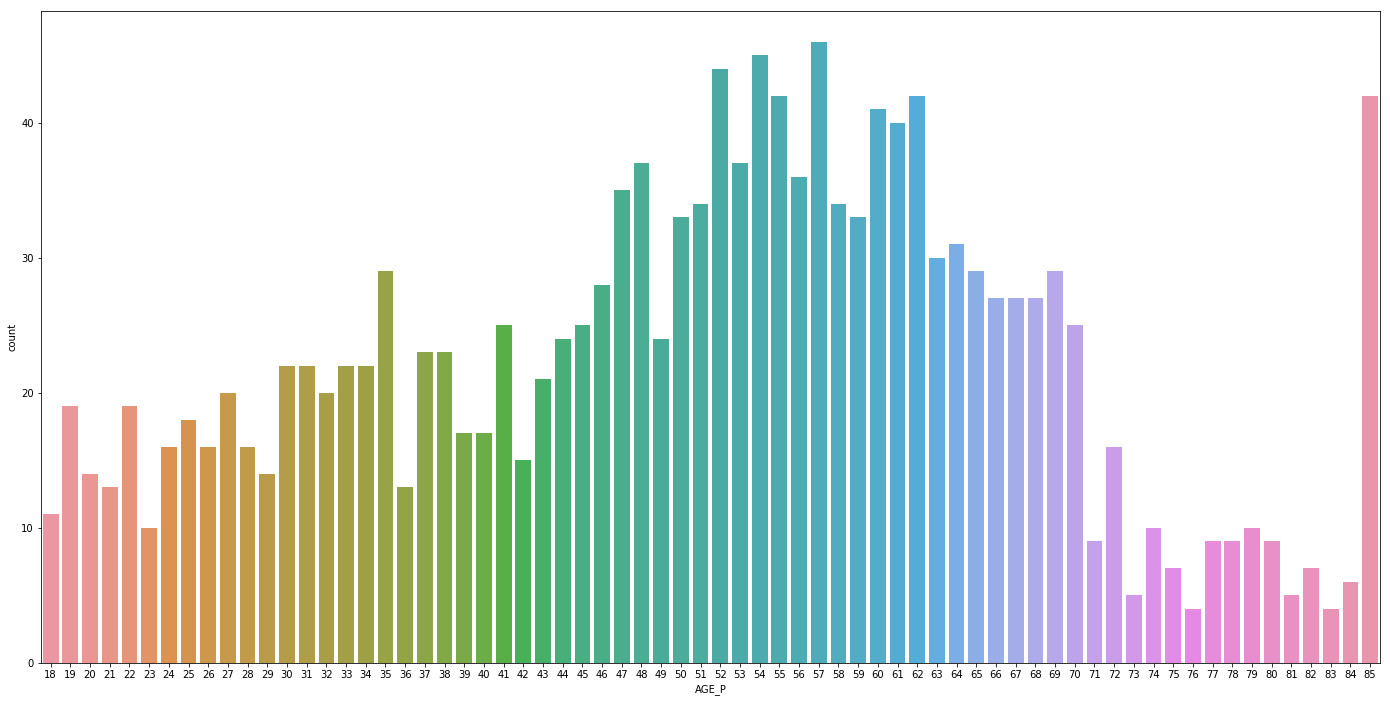

In [228]:
plt.figure(figsize = (24, 12))
sns.countplot(df_age['AGE_P'])

In [ ]:
age_dict = {'18-24': [18:24]}

## Plot of Depression X Age

In [229]:
[18:24]

SyntaxError: invalid syntax (<ipython-input-229-9176647319fe>, line 1)